# Stack Overflow Developer Survey 2017 Analysis

## Introduction
This project aims to analyze the 2017 Stack Overflow Developer Survey data. 
We will explore:
1. The most popular programming languages among developers.
2. The average salaries across different countries.
3. General insights about developers.

## Business Understanding
The objective is to analyze Stack Overflow survey data to gain insights about:
1. Which countries offer the highest average salaries for developers.
2. The distribution of programming hobbies among developers worldwide.
These insights could help aspiring developers understand global trends and prioritize certain skills or locations.


## Data Understanding

In [15]:

def load_data(file_path):
    """
    Load data from a CSV file into a DataFrame.

    Parameters:
        file_path (str): The path to the CSV file.

    Returns:
        DataFrame: The loaded dataset.
    """
    import pandas as pd # Importing pandas for data manipulation.
    return pd.read_csv(file_path) # Read the CSV file and return it as a DataFrame.



def display_general_statistics(data):
    """
    Display general statistics of the given dataset.

    Parameters:
        data (DataFrame): The dataset to analyze.

    Returns:
        None: Prints the general statistics.
    """
    # Print statistical summaries like mean, median, and standard deviation for numerical columns.
    print(data.describe())


# Display general statistics of the dataset
# This step provides an overview of statistical metrics like mean, median, and standard deviation,
# which help to understand the distribution of the data and identify potential anomalies.
print(filtered_data.describe())

# Check for missing values in the dataset
# Identifying missing values is crucial for data cleaning and ensuring the dataset is complete and usable.
print(filtered_data.isnull().sum())


              Salary
count   12891.000000
mean    56298.480641
std     39880.905277
min         0.000000
25%     26440.371839
50%     50000.000000
75%     80000.000000
max    197000.000000
Country         0
ProgramHobby    0
Salary          0
dtype: int64


## Data Preparation
The data was filtered to include only the relevant columns:
- `Country`: To group and compare salary data by location.
- `ProgramHobby`: To analyze developer interests.
- `Salary`: To calculate average salaries.
Missing values were removed to ensure accuracy in the analysis.

## Modeling
- The average salary by country was calculated using the `groupby` and `mean` functions.
- The distribution of programming hobbies was analyzed using `value_counts`.

## Evaluation
The results show:
- Countries like Switzerland and the United States offer the highest average salaries for developers.
- A significant number of developers enjoy programming as a hobby, indicating strong engagement with their work.

## Deployment
The results will be shared through:
1. A GitHub repository containing the full code and analysis.
2. A blog post summarizing the key insights and visualizations.

### Steps
1. Load and inspect the data.
2. Clean the data.
3. Perform the required analyses.
4. Visualize the results.
5. Document and push the project to GitHub.

In [16]:
import pandas as pd
# Pandas is a powerful library for data manipulation and analysis.
# It provides data structures such as DataFrame and Series, which make it easy to handle structured data.
# Pandas allows reading and writing data from various formats (CSV, Excel, JSON, SQL, etc.),
# cleaning and preprocessing data, performing aggregations, and merging datasets efficiently.


import matplotlib.pyplot as plt
# Matplotlib was chosen for visualization because it provides a flexible and widely used interface for creating plots.
# It is especially suitable for creating simple visualizations like histograms and scatter plots.

### Loading the Data
We load the survey data from the `survey_results_public.csv` file using Pandas.

In [17]:
file_path = "survey_results_public.csv"  # Provide the correct path to the file.
data = pd.read_csv(file_path)



# Display the first 5 rows.
data.head()


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Inspecting the Columns
We inspect the columns to identify which ones are relevant to our analysis.

In [18]:
# Display the names of all columns in the dataset
# This helps understand the structure of the data and locate the columns of interest.
print(data.columns)

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)


### Data Cleaning
We examine the missing values and remove unnecessary columns to prepare the data for analysis.

In [19]:
# Select relevant columns
columns_needed = ['Country', 'ProgramHobby', 'Salary']
filtered_data = data[columns_needed]

# Remove rows with missing values
filtered_data.dropna(inplace=True)

# Display the cleaned data
filtered_data.head()

<ipython-input-19-f369258beeb6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(inplace=True)


,Country,ProgramHobby,Salary
2,United Kingdom,"Yes, both",113750.0
14,United Kingdom,"Yes, I program as a hobby",100000.0
17,United States,"Yes, both",130000.0
18,United States,"Yes, I program as a hobby",82500.0
22,Israel,No,100764.0


### Analyze Most Popular Programming Languages
We analyze the `HaveWorkedLanguage` column to determine the most commonly used programming languages among developers.

Top 10 Programming Languages Used:
HaveWorkedLanguage
 SQL           18466
 JavaScript    17159
 Python        10719
 PHP            9765
 Java           8622
C#              8596
Java            5902
JavaScript      5716
C               5563
 C++            4628
Name: count, dtype: int64


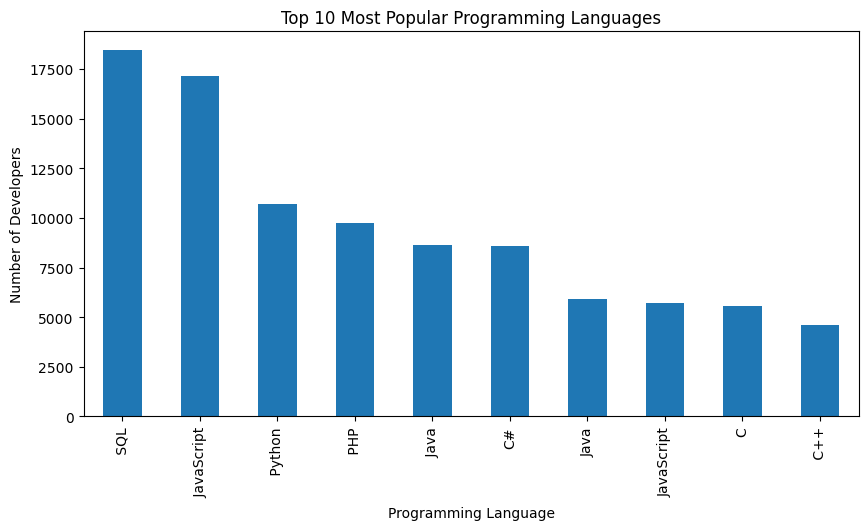

In [30]:
# Check if the column 'HaveWorkedLanguage' exists in the dataset
if 'HaveWorkedLanguage' in data.columns:

    # Remove rows with missing values to ensure accurate language count.
    # Missing values could skew the analysis if not handled.
    languages = data['HaveWorkedLanguage'].dropna().str.split(';').explode()

    # Split semicolon-separated strings into individual languages and "explode" them into separate rows.
    # This approach allows counting each language occurrence individually, as developers can work with multiple languages.


    # Count the occurrences of each programming language and get the top 10 most used languages
    top_languages = languages.value_counts().head(10)

    # Print the top 10 programming languages used
    print("Top 10 Programming Languages Used:")
    print(top_languages)



    # Plot a bar chart of the top 10 programming languages
    # A bar chart makes it easier to compare the popularity of languages
    top_languages.plot(kind='bar', figsize=(10, 5))
    plt.title("Top 10 Most Popular Programming Languages")
    plt.xlabel("Programming Language")
    plt.ylabel("Number of Developers")
    plt.show()
    # Print The error message if not found in the dataset
else:
    print("Column 'HaveWorkedLanguage' not found in the dataset.")

#### Bar Chart of Most Popular Programming Languages
The chart below shows the top 10 most commonly used programming languages among developers.

### Analyze Salaries by Country
We analyze the `ConvertedComp` column to calculate the average salaries in different countries.

In [22]:
# Calculate the average salary by country
avg_salary_by_country = filtered_data.groupby('Country')['Salary'].mean().sort_values(ascending=False).head(10)

# Display the results
print(avg_salary_by_country)

Country
Virgin Islands (USA)           175000.000000
Bermuda                        150000.000000
U.S. Minor Outlying Islands    136000.000000
Uganda                         120000.000000
Kuwait                         115200.000000
Anguilla                       100000.000000
United States                   96194.754635
Liechtenstein                   93766.666667
Switzerland                     91189.692616
Iceland                         80645.161290
Name: Salary, dtype: float64


### Analyzing Programming Hobbies
We count the frequency of different programming hobbies among developers to understand their preferences.

In [23]:
# Count the frequency of programming hobbies
hobbies = filtered_data['ProgramHobby'].value_counts()

# Display the results
print(hobbies)


ProgramHobby
Yes, I program as a hobby                    6134
Yes, both                                    3622
No                                           2441
Yes, I contribute to open source projects     694
Name: count, dtype: int64


### Visualization: Average Salaries by Country
The bar chart below shows the top 10 countries with the highest average developer salaries.

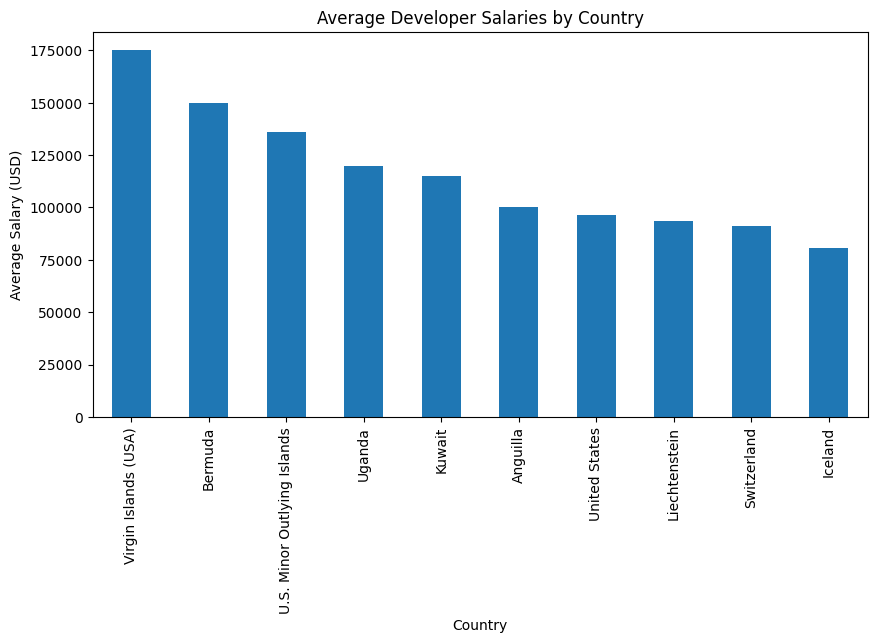

In [24]:
# Plot a bar chart for average salaries by country
avg_salary_by_country.plot(kind='bar', figsize=(10, 5))
plt.title("Average Developer Salaries by Country")
plt.xlabel("Country")
plt.ylabel("Average Salary (USD)")
plt.show()

### Visualization: Distribution of Programming Hobbies
The bar chart below shows the distribution of programming hobbies among developers.

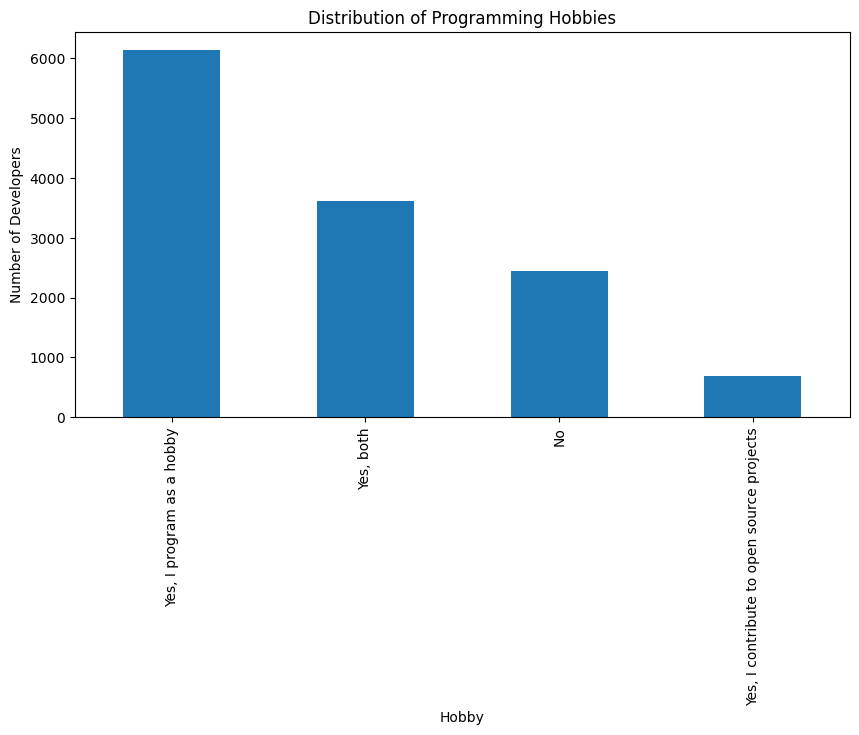

In [25]:
# Plot a bar chart for programming hobbies distribution
hobbies.plot(kind='bar', figsize=(10, 5))
plt.title("Distribution of Programming Hobbies")
plt.xlabel("Hobby")
plt.ylabel("Number of Developers")
plt.show()